# Data to Dome: Visualizing Gamma Ray Bursts in WWT

For this month’s tutorial we will create a visualization of Gamma Ray Bursts. The tutorial was created for A KICP short course for museum and planetarium staff about the Evolving Universe (http://kicp-courses.uchicago.edu/2014/index.php) held this September. Here we will only visualize the data in WWT. While similar visualizations are possible in other planetarium software packages, the process of creating them is somewhat awkward. The time domain is the next great frontier for astronomy, I encourage software vendors to follow along with the tutorial and think about how they can streamline the process of creating a similar visualization using their software.<br><br>
Mark Subbarao (msubbarao at adlerplanetarium.org)

##### Python Setup

In [1]:
from astropy.table import Table,Column
from astropy.time import Time
from astropy import units
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

C:\Anaconda\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
#Create Vizier object, turn off default row limit
v = Vizier()
v.ROW_LIMIT = -1

##### WWT Setup

In [3]:
from pywwt.mods import *

In [64]:
#Connect to WWT
wwt = WWTClient() #Can pass a IP address here if WWT is running on a remote machine
wwt.new_layer_group("Sky","Dynamic Universe")

### Gamma Ray Bursts

For out data catalog we'll choose The second Fermi/GBM GRB catalog (4yr) (von Kienlin+, 2014)
Vizier catalog: J/ApJS/211/13/GBM
Which contains Fermi events from July 2007 to July 2012

In [3]:
Cats = v.get_catalogs('J/ApJS/211/13/GBM')
grbCat=Cats[0]
grbCat.keep_columns(["GRB","RAJ2000","DEJ2000","Time","ObsTime","Fl.w","Fl.n"])
grbCat.rename_column('RAJ2000', 'RA')
grbCat.rename_column('DEJ2000', 'dec')

C:\Anaconda\lib\site-packages\astroquery\vizier\core.py:556: UserWarning: VOTABLE parsing raised exception: 
  warnings.warn("VOTABLE parsing raised exception: {0}".format(ex))


In [8]:
#Plot the Catalog
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

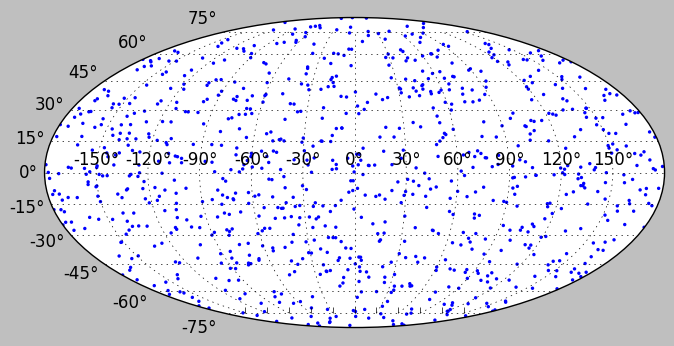

In [23]:
#Plot the Catalog
coordsCol=SkyCoord(grbCat['RA'],grbCat['dec'],'icrs')
fig = plt.figure (figsize=(8,6))
ax = fig.add_subplot(111,projection="mollweide", axisbg='white')
ax.grid(True)
ax.get_xaxis().tick_bottom()
ax.scatter(coordsCol.galactic.l.wrap_at(180.*units.degree).radian,\
           coordsCol.galactic.b.radian,s=6,lw=0)

Extracting the event time from this table is tricky. The time of day is in the ObsTime column, but the date is embedded in the GRB name. We'll extract the date from the GRB name and combine that with ObsTime to make a astropy time object. 

In [24]:
timeList=[]
grbList=grbCat['GRB']
for i in range(len(grbList)):
    timeString= grbList[i][2:4]+'/'+grbList[i][4:6]+'/'+'20'+grbList[i][0:2]+' '+grbCat['ObsTime'][i]
    timeList.append(timeString)

##### Export Catalog to WWT

WWT contains its own time format, unfortunately one that astropy cannot write, so we'll have to create our own custom string.

In [25]:
grbList=grbCat['GRB']
timeList=[]
for i in range(len(grbList)):
    timeString= grbList[i][2:4]+'/'+grbList[i][4:6]+'/'+'20'+grbList[i][0:2]+' '+grbCat['ObsTime'][i]
    timeList.append(timeString)
grbCat.add_column(Column(timeList,name='TimeAndDate'))
grbCat

GRB,ObsTime,RA,dec,Time,Fl.w,Fl.n,TimeAndDate
,"""h:m:s""",deg,deg,ms,mJ / m2,mJ / m2,
080714B,02:04:12.0534,41.9,8.5,512,6.8e-07,3.5e-07,07/14/2008 02:04:12.0534
080714C,10:12:01.8376,187.5,-74.0,4096,1.8e-06,9.8e-07,07/14/2008 10:12:01.8376
080714A,17:52:54.0234,188.1,-60.2,1024,6.3e-06,3.3e-06,07/14/2008 17:52:54.0234
080715A,22:48:40.1634,214.7,9.9,256,5e-06,2.5e-06,07/15/2008 22:48:40.1634
080717A,13:02:35.2207,147.3,-70.0,4096,4.5e-06,2.4e-06,07/17/2008 13:02:35.2207
080719A,12:41:40.9578,153.2,-61.3,4096,7.7e-07,3.9e-07,07/19/2008 12:41:40.9578
080720A,07:35:35.5476,98.5,-43.9,8192,--,--,07/20/2008 07:35:35.5476
080723B,13:22:21.3751,176.8,-60.2,256,7.2e-05,3.9e-05,07/23/2008 13:22:21.3751
080723C,21:55:23.0583,113.3,-19.7,64,1.3e-07,7.5e-08,07/23/2008 21:55:23.0583


In [81]:
#Set up WWT layer
grb_layer = wwt.new_layer("Dynamic Universe", "Gamma Ray Bursts", grbCat.colnames)
#Set visualization parameters in WWT
props_dict = {"CoordinatesType":"Spherical",\
              "MarkerScale":"Screen",\
              "PointScaleType":"Constant",\
              "ScaleFactor":"64",\
              "ShowFarSide":"True",\
              "RaUnits":"Degrees",\
              "PlotType":"Gaussian",\
              "ColorValue":"ARGBColor:255:255:255:255",\
              "TimeSeries":"False"}
grb_layer.set_properties(props_dict)
#Send data to WWT client
grb_layer.update(data=grbCat, purge_all=True, no_purge=False, show=True)

Now inside WWT we can choose how we visualize the data, we can show all the data at once or playback the events as they happen watching the GRB’s go off like popcorn across the sky. 

<img src=https://raw.githubusercontent.com/IPSScienceVisualization/python-tutorials/master/images/GRBWWT.png>